In [2]:
import pandas as pd
import numpy as np
import pickle

In [3]:
IPLdata=pd.read_csv("ipl.csv")

In [4]:
IPLdata.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
IPLdata.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [6]:
IPLdata.describe(include='O')

,date,venue,bat_team,bowl_team,batsman,bowler
count,76014,76014,76014,76014,76014,76014
unique,442,35,14,14,411,329
top,2011-04-22,M Chinnaswamy Stadium,Mumbai Indians,Delhi Daredevils,SK Raina,Harbhajan Singh
freq,257,7443,10213,10245,1921,1404


In [7]:
IPLdata.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [8]:
IPLdata.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [9]:
import datetime
IPLdata['date']=IPLdata['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

In [10]:
IPLdata.dtypes

mid                        int64
date              datetime64[ns]
venue                     object
bat_team                  object
bowl_team                 object
batsman                   object
bowler                    object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
striker                    int64
non-striker                int64
total                      int64
dtype: object

In [11]:
IPLdata.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
IPLdata.bat_team.value_counts()

Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: bat_team, dtype: int64

In [13]:
IPLdata=IPLdata[~IPLdata['bat_team'].isin(['Kochi Tuskers Kerala','Pune Warriors','Gujarat Lions','Rising Pune Supergiants','Rising Pune Supergiant'])].reset_index(drop=True)

In [14]:
IPLdata.shape

(69229, 15)

In [15]:
IPLdata.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
69224,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
69225,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
69226,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
69227,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
69228,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [16]:
IPLdata.drop(['mid','batsman','bowler','striker','non-striker'],1,inplace=True)

In [17]:
IPLdata.shape

(69229, 10)

In [18]:
IPLdata.loc[:,['venue']]

,venue
0,M Chinnaswamy Stadium
1,M Chinnaswamy Stadium
2,M Chinnaswamy Stadium
3,M Chinnaswamy Stadium
4,M Chinnaswamy Stadium
...,...
69224,"Rajiv Gandhi International Stadium, Uppal"
69225,"Rajiv Gandhi International Stadium, Uppal"
69226,"Rajiv Gandhi International Stadium, Uppal"
69227,"Rajiv Gandhi International Stadium, Uppal"


In [19]:
Venue_Dist=pd.DataFrame(pd.Series(IPLdata.loc[:,'venue']).value_counts()).reset_index()

In [20]:
Venue_Dist['percent']=((Venue_Dist['venue'])/(sum(Venue_Dist['venue'])))*100

In [21]:
Venue_Dist

,index,venue,percent
0,Eden Gardens,6926,10.004478
1,M Chinnaswamy Stadium,6814,9.842696
2,Feroz Shah Kotla,6568,9.487354
3,Wankhede Stadium,6443,9.306793
4,"MA Chidambaram Stadium, Chepauk",5850,8.450216
5,"Rajiv Gandhi International Stadium, Uppal",5458,7.883979
6,"Punjab Cricket Association Stadium, Mohali",4004,5.783703
7,Sawai Mansingh Stadium,3738,5.399471
8,Kingsmead,1731,2.500397
9,"Sardar Patel Stadium, Motera",1484,2.143610


In [22]:
IPLdata=IPLdata[~IPLdata['venue'].isin(['De Beers Diamond Oval','Holkar Cricket Stadium','OUTsurance Oval','Nehru Stadium','Green Park'])].reset_index(drop=True)

In [23]:
IPLdata.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Maharashtra Cricket Association Stadium',
       'Punjab Cricket Association IS Bindr

In [24]:
IPLdata.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [25]:
IPLdata.bat_team=IPLdata.bat_team.replace('Deccan Chargers','Sunrisers Hyderabad')    

In [26]:
IPLdata.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils'], dtype=object)

In [27]:
IPLdata.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [65]:
IPLdata1=IPLdata

In [66]:
IPLdata1.bowl_team=IPLdata1.loc[:,'bowl_team'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [67]:
IPLdata1.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Rising Pune Supergiant'], dtype=object)

In [68]:
IPLdata1=IPLdata1[~IPLdata1['bowl_team'].isin(['Kochi Tuskers Kerala','Pune Warriors','Gujarat Lions','Rising Pune Supergiants','Rising Pune Supergiant'])].reset_index(drop=True)

In [69]:
IPLdata1

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...,...
61590,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
61591,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
61592,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
61593,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [70]:
IPLdata1=IPLdata1.drop(['venue'],axis=1)

In [71]:
IPLdata1.head(2)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222


In [72]:
IPLdata1=IPLdata1[IPLdata1['overs'] > 5.0].reset_index(drop=True)

In [73]:
IPLdata1.tail(2)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
45884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107
45885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107


In [74]:
encoded_df=pd.get_dummies(data=IPLdata1,columns=['bat_team','bowl_team'])

In [75]:
encoded_df.shape


(45886, 23)

In [100]:
encoded_df.head(2)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
X_train=encoded_df.drop(['total'],1)[encoded_df['date'].dt.year <=2016]

In [77]:
X_test=encoded_df.drop(['total'],1)[encoded_df['date'].dt.year > 2016]

In [78]:
Y_train=encoded_df[['total']][encoded_df['date'].dt.year <=2016].values

In [79]:
Y_test=encoded_df[encoded_df['date'].dt.year > 2016]['total'].values

In [80]:
X_train.drop(['date'],1,inplace=True)
X_test.drop(['date'],1,inplace=True)

In [81]:
X_train.shape

(43298, 21)

In [82]:
X_train.head(2)

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,61,0,5.1,59,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,61,1,5.2,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [83]:
Y_test

array([207, 207, 207, ..., 107, 107, 107], dtype=int64)

**Ready to apply Modelling**

In [84]:
import sklearn

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

**LinearRegression**

In [86]:
mod=LinearRegression()
Reg=mod.fit(X_train,Y_train)

In [88]:
pred=Reg.predict(X_test)

In [94]:
X=pred.tolist()
X

[[169.2563670338617],
 [172.26010256225567],
 [171.74214593478698],
 [174.74588146318098],
 [177.81538704208998],
 [178.14496842832946],
 [176.0738730521191],
 [175.49014637413538],
 [176.14857801294988],
 [177.68473199662077],
 [177.94854333234525],
 [178.47543487012973],
 [176.20702934237437],
 [176.47084067809882],
 [176.7346520138233],
 [181.76231382220865],
 [182.09189520844814],
 [182.42147659468762],
 [181.0006090806404],
 [181.33019046687988],
 [181.59400180260434],
 [181.92358318884382],
 [183.16647263930648],
 [184.40936208976913],
 [181.22764849779057],
 [181.55722988403005],
 [181.8868112702695],
 [182.28216270702399],
 [182.8090542448085],
 [182.15955751630977],
 [180.0884621400994],
 [183.35527787055344],
 [176.69637955210658],
 [177.22327108989106],
 [178.6634706918987],
 [179.90636014236136],
 [177.637954614606],
 [176.98845788610728],
 [177.31803927234674],
 [177.64762065858622],
 [180.71712623749522],
 [181.04670762373473],
 [181.51822628864886],
 [186.41434799600424]

In [95]:
print("MAE :",sklearn.metrics.mean_absolute_error(pred,Y_test))
#print("MAPE :",sklearn.metrics.mean_absolute_error(((pred,Y_test)/Y_test))*100)
print("MSE:",sklearn.metrics.mean_squared_error(pred,Y_test))
print("RMSE",np.sqrt(sklearn.metrics.mean_squared_error(pred,Y_test)))

MAE : 12.10082889919981
MSE: 251.37449540708377
RMSE 15.854794082771424


In [98]:
filename="linearreg1.pkl"

pickle.dump(Reg,open(filename,'wb'))

In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
mod1=Ridge()

In [205]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [206]:
ridge_regressor=GridSearchCV(mod1,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_regressor.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.27851e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.26537e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.33311e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.32191e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_ridge.py:148

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error', verbose=1)

In [207]:
ridge_regressor.best_params_


{'alpha': 40}

In [208]:
ridge_regressor.best_score_

-315.540387598389

In [221]:
prediction=ridge_regressor.predict(X_test)

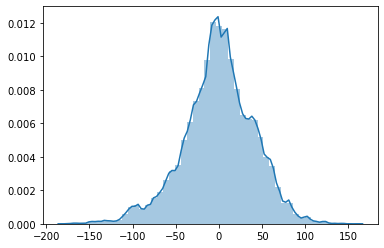

In [210]:
import seaborn
seaborn.distplot(Y_test-prediction)

In [211]:
from sklearn import metrics
import numpy as np
print('MAE',metrics.mean_absolute_error(Y_test,prediction))
print('MSE',metrics.mean_squared_error(Y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

MAE 12.097117740357664
MSE 251.3114198935219
RMSE 15.852804795793137


In [213]:
file=open("ridgereg.pkl","wb")
pickle.dump(ridge_regressor,file)

In [214]:
from sklearn.linear_model import Lasso

In [215]:
mod2=Lasso()

In [216]:
from sklearn.model_selection import GridSearchCV
LassoReg=GridSearchCV(mod2,param_grid=parameters,scoring="neg_mean_squared_error",cv=5,verbose=2)

In [217]:
LassoReg.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] alpha=1e-15 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5166568.001726117, tolerance: 2862.2422417604967
  positive)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


[CV] ...................................... alpha=1e-15, total=  10.3s
[CV] alpha=1e-15 .....................................................


C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5178362.418781408, tolerance: 2881.3082693804495
  positive)


[CV] ...................................... alpha=1e-15, total=  10.0s
[CV] alpha=1e-15 .....................................................


C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5082960.376805572, tolerance: 2906.376691760493
  positive)


[CV] ...................................... alpha=1e-15, total=  10.7s
[CV] alpha=1e-15 .....................................................


C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4852629.077697933, tolerance: 2987.653791194895
  positive)


[CV] ...................................... alpha=1e-15, total=  10.3s
[CV] alpha=1e-15 .....................................................


C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5018023.378233189, tolerance: 2895.24377538035
  positive)


[CV] ...................................... alpha=1e-15, total=  10.1s
[CV] alpha=1e-10 .....................................................


C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 576698.5021617599, tolerance: 2862.2422417604967
  positive)


[CV] ...................................... alpha=1e-10, total=  10.0s
[CV] alpha=1e-10 .....................................................
[CV] ...................................... alpha=1e-10, total=   4.9s
[CV] alpha=1e-10 .....................................................
[CV] ...................................... alpha=1e-10, total=   4.2s
[CV] alpha=1e-10 .....................................................


C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317495.8373325579, tolerance: 2987.653791194895
  positive)


[CV] ...................................... alpha=1e-10, total=  10.6s
[CV] alpha=1e-10 .....................................................


C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243522.83940001857, tolerance: 2895.24377538035
  positive)


[CV] ...................................... alpha=1e-10, total=  10.7s
[CV] alpha=1e-08 .....................................................


C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 576697.6371376598, tolerance: 2862.2422417604967
  positive)


[CV] ...................................... alpha=1e-08, total=  12.0s
[CV] alpha=1e-08 .....................................................
[CV] ...................................... alpha=1e-08, total=   4.4s
[CV] alpha=1e-08 .....................................................
[CV] ...................................... alpha=1e-08, total=   3.5s
[CV] alpha=1e-08 .....................................................


C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317495.7098866692, tolerance: 2987.653791194895
  positive)


[CV] ...................................... alpha=1e-08, total=  10.1s
[CV] alpha=1e-08 .....................................................


C:\Users\adity\Anaconda3\envs\IPLscorepred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243521.56380547583, tolerance: 2895.24377538035
  positive)


[CV] ...................................... alpha=1e-08, total=  10.7s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   1.5s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   2.1s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   2.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   1.5s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   2.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   1.6s
[CV] alpha=0.01 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.7min finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error', verbose=2)

In [218]:
LassoReg.best_score_

-313.53300615212567

In [219]:
LassoReg.best_estimator_

Lasso(alpha=1)

In [220]:
LassoReg.best_index_

5

In [222]:
file=open("lassoreg.pkl","wb")
pickle.dump(LassoReg,file)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures